# Titanic Dataset: Exploratory Data Analysis¶
In this notebook, we're going to analyse the famous Titanic dataset from Kaggle. The dataset is meant for supervised machine learning, but we're only going to do some exploratory analysis at this stage.

We'll try to answer the following questions:

#1.Who were the passengers on the Titanic? (age, gender, class.. etc)
#2.What deck were the passengers on and how does that relate to their class?
#3.Where did the passengers come from?
#4.Who was alone and who was with family?
#5.What factors helped someone survive the sinking?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_titanic = pd.read_csv('titanic.csv')

In [3]:
print(df_titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB



From above, we see that the dataset is missing a lot of information in for the Cabin column. We'll need to deal with that when we go about using the cabin data.

Other information seems to be complete, except some Age entries

In [5]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Pandas' awesome describe method quickly gives us some aggregate stats for the dataset.

A 1 in the Survived column means that the person survived, while a 0 mean that they died. So looking at the mean, we can say that only ~38% people survived the sinking.

# Who were the passengers on the Titanic?
Let's look at some demographical information about the passengers.

In [6]:
df_titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

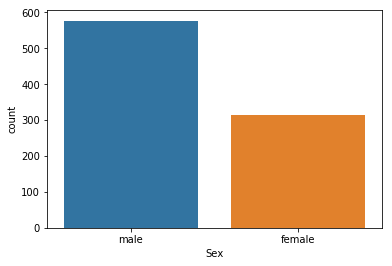

In [7]:
sns.countplot('Sex',data=df_titanic)


Unsurprisingly, there were considerably more male passengers onboard.

Let's take a look at how the passengers were divided among different classes.

Note: The Pclass attribute is a proxy for the socio-economic class of a person.

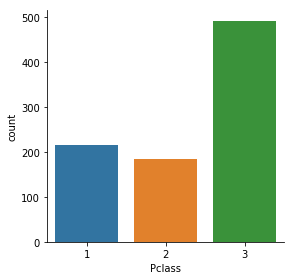

In [8]:
sns.factorplot('Pclass',data=df_titanic,kind='count')

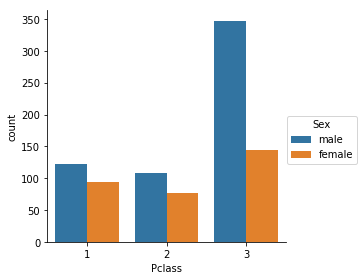

In [9]:
sns.factorplot('Pclass',kind='count',data=df_titanic,hue='Sex')

Another thing we can do before we start infering something from the above factorplot, is to divide the passengers between male, female, and a child.

In [10]:
def child_fun(df_titanic):
    age = df_titanic['Age']
    sex = df_titanic['Sex']
    return 'child' if age < 16 else sex

df_titanic['Person'] = df_titanic.apply(child_fun,axis=1)

In [11]:
print(df_titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0       

In [12]:
df_titanic['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64


Now, let's create a factorplot to check out the distribution of men, women and children belonging to different classes.

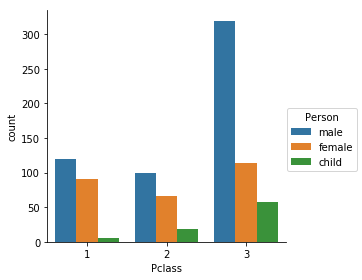

In [13]:
sns.factorplot('Pclass',kind='count',data=df_titanic,hue='Person')

What's interesting to note above, is that there are way more male passengers than woman or childeren, in the 3rd class, than any other class. This will lead to an interesting analysis later on.

We can quickly create a histogram from the dataset, to check out the distribution of passengers of different age groups.

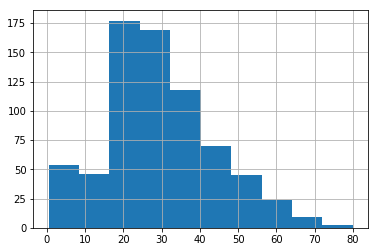

In [14]:
df_titanic['Age'].hist()

Let's check out how the age distribution varies for different classes. We'll use Seaborn's Facetgrid for this purpose.

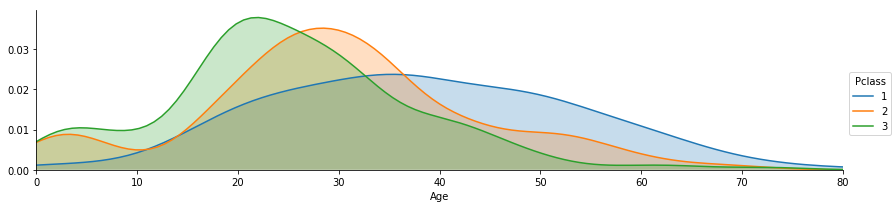

In [15]:
fig = sns.FacetGrid(df_titanic,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest_age = df_titanic['Age'].max()
fig.set(xlim=(0,oldest_age))
fig.add_legend()


Quite clearly, we can see that the first class passengers belonged more to the middle age groups, with very few children.

Second and third class had more children, with relatively fewer older people.

# What deck were the passengers on and how does that relate to their class?¶

As we're doing open ended analysis, let's try and check out if people belonging to higher classes were assigned cabins on a higher deck (or level) of the ship.

In [16]:
df_titanic['Cabin'].isnull().sum()
##Here we can see that 687 values are null into cabin column

687

In [17]:
deck_df = df_titanic.dropna(axis=0)

In [18]:
print(deck_df.head())

    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Cabin Embarked  Person  
1       0  PC 17599  71.2833   C85        C  female  
3       0    113803  53.1000  C123        S  female  
6       0     17463  51.8625   E46        S    male  
10      1   PP 9549  16.7000    G6        S   child  
11      0    113783  26.5500  C103    


How do we find out what deck a passenger was assigned?

The Cabin attribtute holds that data. Intuitively, the cabin number of a passenger is a combination of the deck they're on, and their room number. So a passenger on deck 'C' will have a cabin number in CXXX format, where XXX can be a room number.

We just need to create a python method to extract first character from the cabin information.

In [19]:
def getLevel(data):
    level_full = data['Cabin']
    return level_full[0]
deck_df['Level'] = deck_df.apply(getLevel,axis=1)

C:\Users\IamChamp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [20]:
deck_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Level
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,C


In [21]:
deck_df['Level'].value_counts()

C    51
B    43
D    31
E    30
A    12
F    11
G     4
T     1
Name: Level, dtype: int64

Everything seems to work, so now we can check out how many passengers belonged to different decks.

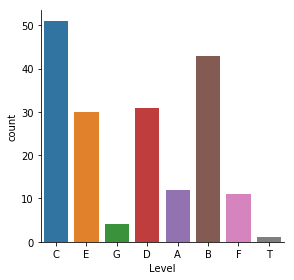

In [22]:
sns.factorplot('Level',kind='count',data=deck_df)

And to answer our original question..

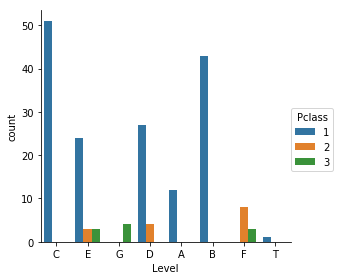

In [23]:
sns.factorplot('Level',kind='count',hue='Pclass',data=deck_df)

It feels like passengers belonging to the upper classes are indeed assigned to the upper decks. Decks A,B and C were assigned only to first class passengers, and we start seeing third class passengers only from level E. Though, we have to keep in mind that cabin information was missing for more than 3/4 of our passengers.

# Where did the passengers come from?


The Embarked attribute contains data for the passengers' port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

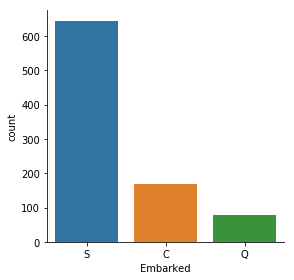

In [24]:
sns.factorplot('Embarked',data=df_titanic,kind='count')

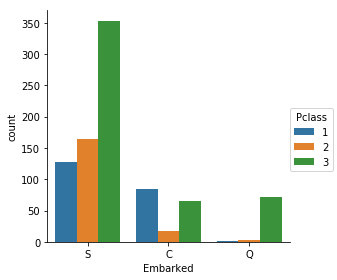

In [25]:
sns.factorplot('Embarked',data=df_titanic,kind='count',hue='Pclass')


Most of the passengers embarked from Southampton (including Jack and Rose, in the movie). What's also interesting, is that almost no first or second class passengers embarked from Queenstown, which can tell us something about the socio-economic status of the population of Queenstown.

# Who was alone and who was with family?

In [26]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


The SibsSP attribute refers to the number of siblings or spouses that a passenger had aboard. Parch refers to the number of parents or children someone had on the ship.

As we're just trying to know if a passenger had someone from his family onboard, we can make our life a bit easier by making another column to represent this data.

In [27]:
df_titanic['Alone'] = df_titanic.SibSp+df_titanic.Parch

In [28]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [29]:
df_titanic['Alone'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Alone, dtype: int64

In [30]:
df_titanic['Alone'].loc[df_titanic['Alone']>0] = 'No'
df_titanic['Alone'].loc[df_titanic['Alone']==0] = 'Yes'

C:\Users\IamChamp\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Yes


In [32]:
df_titanic['Alone'].value_counts()

Yes    537
No     354
Name: Alone, dtype: int64

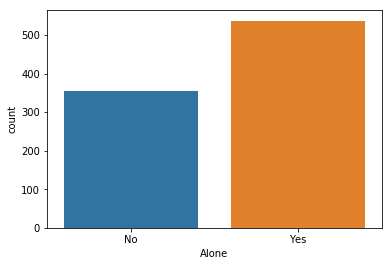

In [33]:
sns.countplot('Alone',data=df_titanic)


The information is pretty simple to digest now. The majority of people on the ship had family on the ship. But did that make a difference in their chances of survival? We'll answer the question in the next section.

# What factors helped someone survive the sinking?

In [34]:
df_titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [35]:
#df_titanic['Survived'].map({0:'No','1':'yes'})

In [36]:
#print(df_titanic.head())

In [37]:
#df_titanic['Survived'].value_counts()

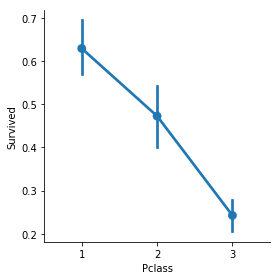

In [38]:
sns.factorplot('Pclass','Survived',data=df_titanic)


To not much surprise, it seems like lower class passengers had a lower chance of survival.

But wait, we saw earlier that there were more men than woman or children, in the 3rd class than in any other class. From the movie 'Titanic', you might remember the 'Women and children first!' protocol that the ship's administration followed while putting passengers on the lifeboats.

Let's see if this is really the case, by using the 'Person' column as the hue in the factorplot.

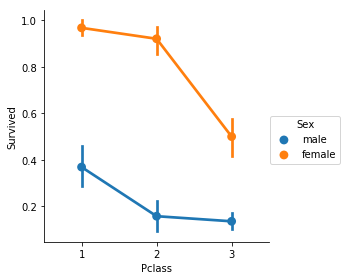

In [39]:
sns.factorplot('Pclass','Survived',data=df_titanic,hue='Sex')

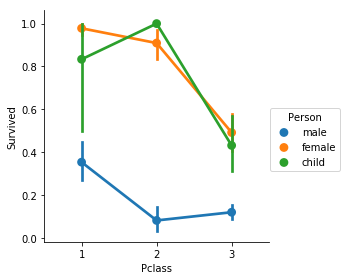

In [40]:
sns.factorplot('Pclass','Survived',data=df_titanic,hue='Person')

And this confirms our suspicion. Men had lower chances of survival than women and children, as they had lower priority of being saved.

We can still generally say that men, women and children belonging to the 3rd class had a lesser chance at survival than their counterparts belonging to the 1st class.

Let's see if there's a relation between the age and survival

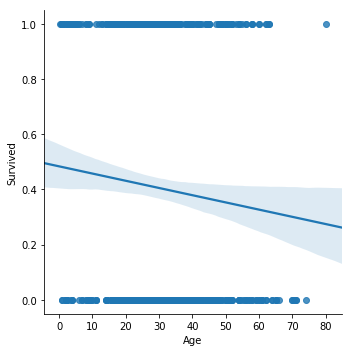

In [41]:
sns.lmplot('Age','Survived',data=df_titanic)

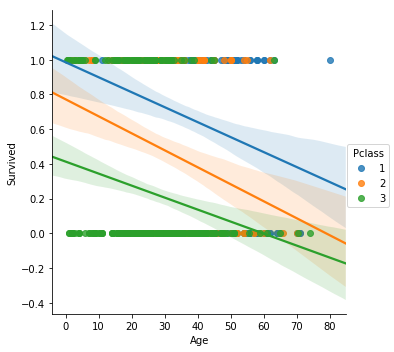

In [44]:

sns.lmplot('Age','Survived',hue='Pclass',data=df_titanic)

The general concensus from the above two figures seems to be that older people were less likely to survive.

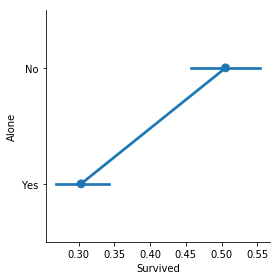

In [46]:
sns.factorplot('Survived','Alone',data=df_titanic)


And if you knew someone on the ship, you had a higher chance of survival, than if you were all alone. Company's always good